/mimer/NOBACKUP/groups/bloom/shenghui/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📊 开始分析数据集: medical_o1_sft_mix.json
📝 总样本数: 24887
🎯 采样分析: 1000 个样本
⚡ 加载tokenizer: meta-llama/Llama-3.2-3B-Instruct
🔄 计算序列长度...
   处理进度: 0/1000
   处理进度: 100/1000
   处理进度: 200/1000
   处理进度: 300/1000
   处理进度: 400/1000
   处理进度: 500/1000
   处理进度: 600/1000
   处理进度: 700/1000
   处理进度: 800/1000
   处理进度: 900/1000

📈 数据长度统计分析报告

🔍 总长度 (Question + Assistant):
   均值: 656.6 tokens
   标准差: 179.6 tokens
   最小值: 269 tokens
   最大值: 1994 tokens
   百分位数:
     P 1:    373 tokens
     P 5:    437 tokens
     P10:    471 tokens
     P25:    542 tokens
     P50:    620 tokens
     P75:    732 tokens
     P90:    877 tokens
     P95:    984 tokens
     P99:   1231 tokens

🔍 问题长度 (Question):
   均值: 66.1 tokens
   标准差: 54.6 tokens
   最小值: 10 tokens
   最大值: 456 tokens
   百分位数:
     P 1:     14 tokens
     P 5:     19 tokens
     P10:     24 tokens
     P25:     35 tokens
     P50:     53 tokens
     P75:     75 tokens
     P90:    117 tokens
     P95:    171 tokens
     P99:    292 tokens

🔍 思考长度 (Thinking):
   均值

/tmp/ipykernel_3776125/1277135208.py:161: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0,1].boxplot([question_lengths, thinking_lengths, response_lengths],
/tmp/ipykernel_3776125/1277135208.py:181: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3776125/1277135208.py:181: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3776125/1277135208.py:181: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3776125/1277135208.py:181: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3776125/1277135208.py:181: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-


📊 可视化图表已保存: medical_o1_sft_mix_length_analysis.png

✅ 分析完成！
推荐设置: max_seq_length = 984


/mimer/NOBACKUP/groups/bloom/shenghui/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/mimer/NOBACKUP/groups/bloom/shenghui/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/mimer/NOBACKUP/groups/bloom/shenghui/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/mimer/NOBACKUP/groups/bloom/shenghui/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/mimer/NOBACKUP/groups/b

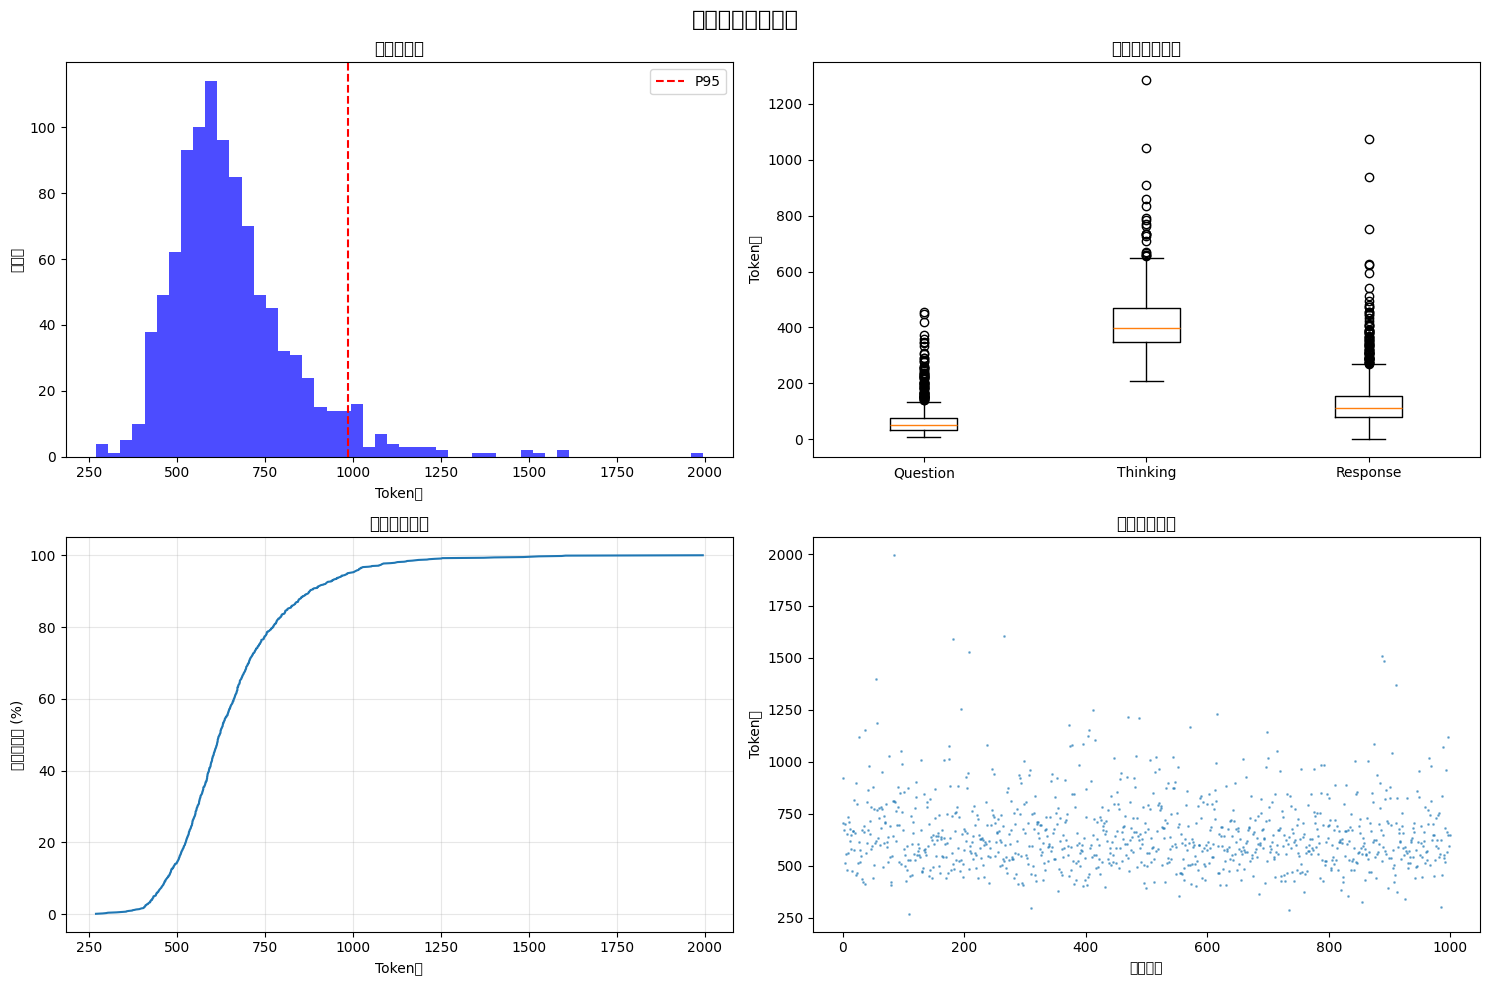

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from typing import List, Dict

def analyze_dataset_lengths(data_path: str, model_path: str = None, sample_size: int = None):
    """
    分析数据集中序列长度的分布
    
    Args:
        data_path: JSON数据文件路径
        model_path: 模型路径，用于加载tokenizer。如果为None，使用字符数估算
        sample_size: 采样大小，如果为None则分析全部数据
    """
    
    print(f"📊 开始分析数据集: {data_path}")
    
    # 1. 加载数据
    with open(data_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    total_samples = len(data)
    print(f"📝 总样本数: {total_samples}")
    
    # 2. 采样（如果数据量太大）
    if sample_size and sample_size < total_samples:
        import random
        data = random.sample(data, sample_size)
        print(f"🎯 采样分析: {len(data)} 个样本")
    
    # 3. 加载tokenizer（如果提供模型路径）
    tokenizer = None
    if model_path:
        try:
            print(f"⚡ 加载tokenizer: {model_path}")
            tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)
        except Exception as e:
            print(f"⚠️  tokenizer加载失败: {e}")
            print("📏 将使用字符数估算token长度")
    
    # 4. 计算长度
    lengths = []
    question_lengths = []
    thinking_lengths = []
    response_lengths = []
    total_lengths = []
    
    print("🔄 计算序列长度...")
    
    for i, item in enumerate(data):
        if i % 100 == 0:
            print(f"   处理进度: {i}/{len(data)}")
        
        question = item['Question']
        thinking = item['Complex_CoT']
        response = item['Response']
        
        # 构建完整的assistant内容
        assistant_content = f"## Thinking\n\n{thinking}\n\n## Final Response\n\n{response}"
        
        if tokenizer:
            # 使用tokenizer精确计算
            try:
                messages = [
                    {"role": "user", "content": question},
                    {"role": "assistant", "content": assistant_content}
                ]
                
                # 应用chat template
                text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=False)
                tokens = tokenizer.encode(text)
                total_length = len(tokens)
                
                # 分别计算各部分长度
                q_tokens = len(tokenizer.encode(question))
                t_tokens = len(tokenizer.encode(thinking))
                r_tokens = len(tokenizer.encode(response))
                
            except Exception as e:
                # fallback到字符估算
                total_length = int(len(question + assistant_content) * 1.3)  # 中文大约1.3倍
                q_tokens = int(len(question) * 1.3)
                t_tokens = int(len(thinking) * 1.3)
                r_tokens = int(len(response) * 1.3)
        else:
            # 字符数估算token数（中文大约1.3倍，英文大约0.75倍）
            total_length = int(len(question + assistant_content) * 1.3)
            q_tokens = int(len(question) * 1.3)
            t_tokens = int(len(thinking) * 1.3)
            r_tokens = int(len(response) * 1.3)
        
        lengths.append(total_length)
        question_lengths.append(q_tokens)
        thinking_lengths.append(t_tokens)
        response_lengths.append(r_tokens)
    
    # 5. 统计分析
    lengths = np.array(lengths)
    question_lengths = np.array(question_lengths)
    thinking_lengths = np.array(thinking_lengths)
    response_lengths = np.array(response_lengths)
    
    print("\n" + "="*60)
    print("📈 数据长度统计分析报告")
    print("="*60)
    
    def print_stats(name: str, data: np.array):
        percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
        values = np.percentile(data, percentiles)
        
        print(f"\n🔍 {name}:")
        print(f"   均值: {data.mean():.1f} tokens")
        print(f"   标准差: {data.std():.1f} tokens")
        print(f"   最小值: {data.min()} tokens")
        print(f"   最大值: {data.max()} tokens")
        print("   百分位数:")
        for p, v in zip(percentiles, values):
            print(f"     P{p:2d}: {v:6.0f} tokens")
    
    # 打印各部分统计
    print_stats("总长度 (Question + Assistant)", lengths)
    print_stats("问题长度 (Question)", question_lengths)
    print_stats("思考长度 (Thinking)", thinking_lengths)
    print_stats("回答长度 (Response)", response_lengths)
    
    # 6. 长度分布分析
    print(f"\n📊 长度分布分析:")
    thresholds = [512, 1024, 2048, 4096, 6144, 8192, 12288, 16384]
    
    print("   超过各阈值的样本比例:")
    for threshold in thresholds:
        count = np.sum(lengths > threshold)
        percentage = count / len(lengths) * 100
        print(f"     > {threshold:5d} tokens: {count:4d} 样本 ({percentage:5.1f}%)")
    
    # 7. 建议的max_seq_length设置
    print(f"\n💡 建议的max_seq_length设置:")
    coverage_targets = [90, 95, 99]
    for target in coverage_targets:
        threshold = np.percentile(lengths, target)
        print(f"   覆盖{target}%数据: max_seq_length = {int(threshold)}")
    
    # 8. 可视化（可选）
    try:
        import matplotlib.pyplot as plt
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('数据长度分布分析', fontsize=16)
        
        # 总长度分布
        axes[0,0].hist(lengths, bins=50, alpha=0.7, color='blue')
        axes[0,0].set_title('总长度分布')
        axes[0,0].set_xlabel('Token数')
        axes[0,0].set_ylabel('样本数')
        axes[0,0].axvline(np.percentile(lengths, 95), color='red', linestyle='--', label='P95')
        axes[0,0].legend()
        
        # 各部分长度对比
        axes[0,1].boxplot([question_lengths, thinking_lengths, response_lengths], 
                         labels=['Question', 'Thinking', 'Response'])
        axes[0,1].set_title('各部分长度分布')
        axes[0,1].set_ylabel('Token数')
        
        # 累积分布
        sorted_lengths = np.sort(lengths)
        cumulative = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths) * 100
        axes[1,0].plot(sorted_lengths, cumulative)
        axes[1,0].set_title('累积分布函数')
        axes[1,0].set_xlabel('Token数')
        axes[1,0].set_ylabel('累积百分比 (%)')
        axes[1,0].grid(True, alpha=0.3)
        
        # 长度 vs 样本索引
        axes[1,1].scatter(range(len(lengths)), lengths, alpha=0.5, s=1)
        axes[1,1].set_title('样本长度分布')
        axes[1,1].set_xlabel('样本索引')
        axes[1,1].set_ylabel('Token数')
        
        plt.tight_layout()
        
        # 保存图片
        output_path = data_path.replace('.json', '_length_analysis.png')
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"\n📊 可视化图表已保存: {output_path}")
        
    except ImportError:
        print("\n⚠️  matplotlib未安装，跳过可视化")
    except Exception as e:
        print(f"\n⚠️  可视化生成失败: {e}")
    
    return {
        'total_samples': len(data),
        'lengths': lengths,
        'question_lengths': question_lengths,
        'thinking_lengths': thinking_lengths,
        'response_lengths': response_lengths,
        'percentiles': {p: np.percentile(lengths, p) for p in [50, 90, 95, 99]},
        'stats': {
            'mean': lengths.mean(),
            'std': lengths.std(),
            'min': lengths.min(),
            'max': lengths.max()
        }
    }

# 使用示例
if __name__ == "__main__":
    # 修改这些路径为你的实际路径
    data_path = "medical_o1_sft_mix.json"  # 你的数据文件路径
    model_path = "meta-llama/Llama-3.2-3B-Instruct"   # 你的模型路径（可选）
    
    # 如果数据量很大，可以设置采样大小
    results = analyze_dataset_lengths(
        data_path=data_path,
        model_path=model_path,  # 如果没有模型，设为None
        sample_size=1000       # 采样1000个样本，设为None则分析全部
    )
    
    print(f"\n✅ 分析完成！")
    print(f"推荐设置: max_seq_length = {int(results['percentiles'][95])}")